# EDA

1. __Cargar los datos__

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<span style="color:pink">Definir la ruta del archivo y cargar dataset</span>


In [14]:
file_path = "../data/train_test/attrition_availabledata_29.csv"
df = pd.read_csv(file_path)

2. __Información general del dataset__

<span style="color:pink"> Ver las primeras filas del dataset</span>

In [15]:
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.462297,13,3,3,3.0,3.0,3.0,48,Travel_Rarely,Research & Development,...,Y,13,8,1,18.0,2,8,7,7,No
1,7.488597,6,1,3,3.0,4.0,4.0,31,Travel_Frequently,Research & Development,...,Y,17,8,1,3.0,2,1,0,0,Yes
2,7.116541,16,2,4,1.0,1.0,3.0,36,Travel_Rarely,Research & Development,...,Y,24,8,0,6.0,6,5,0,3,No
3,9.709125,6,3,4,3.0,3.0,3.0,49,Travel_Rarely,Research & Development,...,Y,22,8,0,25.0,2,7,0,7,No
4,6.297729,6,4,3,3.0,2.0,3.0,40,Travel_Frequently,Research & Development,...,Y,13,8,1,8.0,3,8,3,7,No


<span style="color:pink">Información general sobre las variables</span>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2925 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2911 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

3. __identificar el numero de variables e instancias__

In [17]:
num_filas, num_columnas = df.shape
print(f"Número de instancias: {num_filas}")
print(f"Número de variables: {num_columnas}")

Número de instancias: 2940
Número de variables: 31


4. __Clasificación de variables__

<span style="color:pink">Qué variables son categóricas/ordinales/numéricas</span>

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Variables categóricas: {categorical_cols}")
print(f"Variables numéricas: {numerical_cols}")

Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


5. __Detención de valores nulos__

<span style="color:pink"> Contar valores nulos por columna</span>

In [19]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"Valores faltantes: \n{missing_values}")

Valores faltantes: 
EnvironmentSatisfaction    15
JobSatisfaction            12
WorkLifeBalance            29
NumCompaniesWorked         17
TotalWorkingYears           5
dtype: int64


6. __Identificar columnas constantes o IDs__

<span style="color:pink"> Identificar columnas con un solo valor</span>

In [20]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Columnas constantes: {constant_cols}")

Columnas constantes: ['EmployeeCount', 'Over18', 'StandardHours']


7. __Análisis de balance de clases__ (si es un problema de clasificación)

<span style= "color:pink"> Verificar si el dataset esta desbalanceado</span>

/tmp/ipykernel_34886/2016668422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attrition'], palette='pastel')


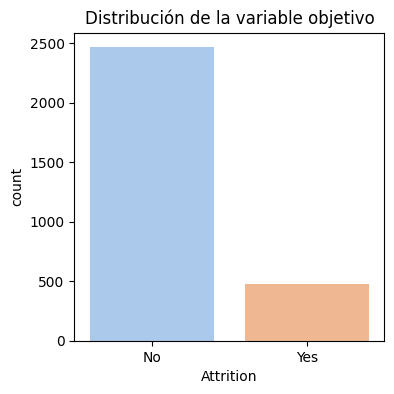

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [26]:
if 'Attrition' in df.columns:
    plt.figure(figsize=(4,4))
    sns.countplot(x=df['Attrition'], palette='pastel')
    plt.title("Distribución de la variable objetivo")
    plt.show()
    
    print(df['Attrition'].value_counts(normalize=True) * 100)

8. __Estadísticas descriptivas__

<span style= "color: pink">Estadísticas básicas de las variables numéricas</span>

In [ ]:
df.describe()

9. __Visualización de la distribución de variables numéricas__

<span style= "color:pink">Histogramas para visualizar la distribución de las variables numéricas</span>

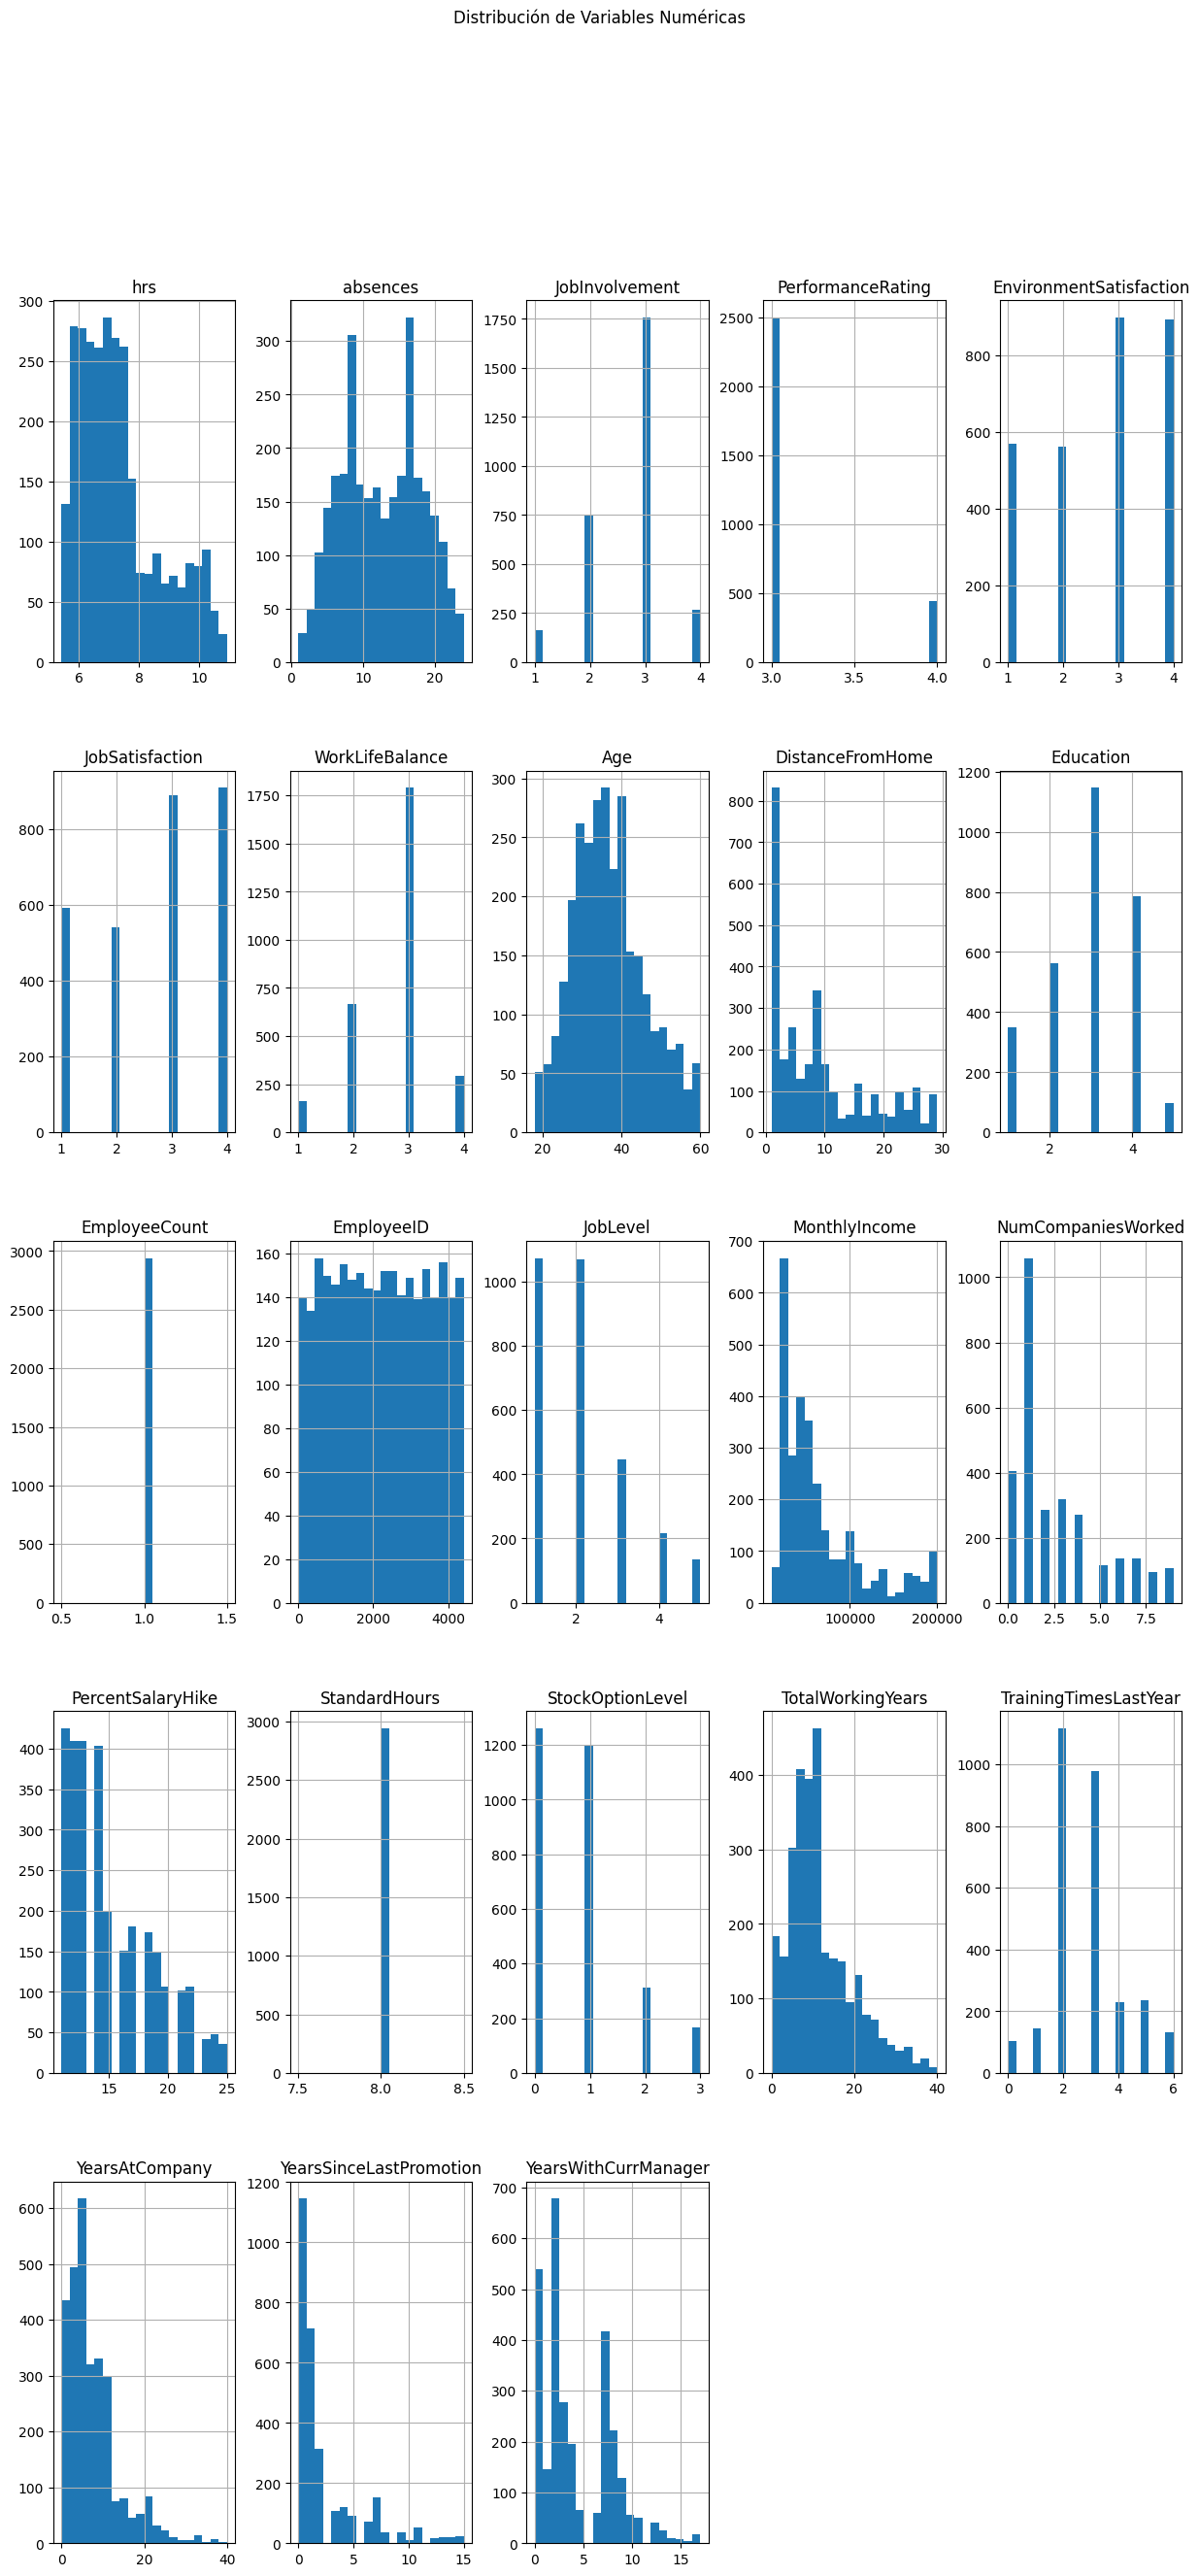

In [37]:
df[numerical_cols].hist(figsize=(15,30), bins=20)
plt.suptitle("Distribución de Variables Numéricas")
plt.show()